## Loading libraries for data pre-processing

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
import keras
from keras.layers import TextVectorization
import string
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import nltk
from gensim.models import Word2Vec
from keras.utils import to_categorical
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from keras.preprocessing.text import Tokenizer
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [2]:
from keras.utils.vis_utils import plot_model
from imblearn.over_sampling import RandomOverSampler

## Loading libraries for DNN model

In [ ]:
#dnn tingys
from keras.layers import Input, UpSampling2D,GlobalAveragePooling2D, Embedding,LSTM, Activation, Dropout, Dense
from keras.applications import MobileNet
from keras.models import Model
import keras.backend as K
from keras.callbacks import Callback
from keras.optimizers import SGD
from keras.datasets import imdb
from keras.utils import to_categorical
from keras.datasets import cifar10
import tensorflow as tf
from keras.metrics import categorical_accuracy, categorical_crossentropy



In [3]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
import numpy as np
import tensorflow as tf

import pickle, os, zipfile, glob


## Loading the data sets with the lebaled and unlabeled data

In [ ]:
#https://drive.google.com/file/d/1z95MrNpAS6MvXkRQ28tIG1iyM463_kP7/view?usp=sharing

In [4]:
!gdown --id 1N0U-i4PxT_DmTru0r7T5po-9f9cwGgB8 -O RedditComments2.csv
!gdown --id 1vT1g4Crj6s6z2YNjSyPx5Fvz5KTpBYSB -O annottated_reddit.csv
#https://drive.google.com/file/d/1WAm75tiLK_StOse6Xp_AzrYDqnJ8F9nR/view?usp=sharing
!gdown 1WAm75tiLK_StOse6Xp_AzrYDqnJ8F9nR -O reddLabelFeatures.csv
#https://drive.google.com/file/d/1p9Vutc0jYZ26d5p0B1rZncOpHzp_UN2M/view?usp=sharing
!gdown 1p9Vutc0jYZ26d5p0B1rZncOpHzp_UN2M -O reddUnlabeledFeatures.csv

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1N0U-i4PxT_DmTru0r7T5po-9f9cwGgB8
To: /content/RedditComments2.csv
100% 4.30M/4.30M [00:00<00:00, 268MB/s]
/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1vT1g4Crj6s6z2YNjSyPx5Fvz5KTpBYSB
To: /content/annottated_reddit.csv
100% 1.51M/1.51M [00:00<00:00, 131MB/s]
Downloading...
From: https://drive.google.com/uc?id=1WAm75tiLK_StOse6Xp_AzrYDqnJ8F9nR
To: /content/reddLabelFeatures.csv
100% 2.27M/2.27M [00:00<00:00, 212MB/s]
Downloading...
From: https://drive.google.com/uc?id=1p9Vutc0jYZ26d5p0B1rZncOpHzp_UN2M
T

In [5]:
df_comments= pd.read_csv("RedditComments2.csv")
#df_meta = pd.read_csv("Reddit_metadata2.csv")
df_comments.drop_duplicates(inplace= True)
df_comments.dropna(inplace=True)
#df_meta.drop_duplicates(inplace= True)
#df_meta.dropna(inplace=True)
df_comments.head()
df_annotated = pd.read_csv("annottated_reddit.csv")
df_annotated.drop_duplicates(inplace= True)
df_annotated.dropna(inplace=True)
df_annotated.head()

,text,subreddit,bucket,annotator,annotation,confidence
0,MLP doesn't need to wait for a referendum to b...,europe,French politics,annotator00,Authority,Not Confident
1,Or - or - assclowns like Le Pen and Farage cou...,worldnews,French politics,annotator02,Equality,Confident
2,Congratulations on your victory Macron voters....,worldnews,French politics,annotator00,Care,Not Confident
3,The German Constitution did not let Hitler bec...,neoliberal,French politics,annotator02,Equality,Somewhat Confident
4,So Republicans really are for liberal policies...,politics,US Politics,annotator03,Equality,Confident


In [6]:
df_unlabeledFeatures = pd.read_csv("reddUnlabeledFeatures.csv")
df_labeledFeatures = pd.read_csv("reddLabelFeatures.csv")


## Getting the indexes from the dataset that have only one label (many annottation have more than one label)

In [10]:
idxcare = np.where(df_labeledFeatures.label == "Care")[0]
idxauth = np.where(df_labeledFeatures.label == "Authority")[0]
idxequal = np.where(df_labeledFeatures.label == "Equality")[0]
idxpropor = np.where(df_labeledFeatures.label == "Proportionality")[0]
idxloyal = np.where(df_labeledFeatures.label == "Loyalty")[0]
onlyIndexes = [idxcare, idxauth, idxequal, idxpropor, idxloyal]

indexessingle = []
for listt in onlyIndexes:
  for idx in listt:
    indexessingle.append(idx)


In [11]:
df_labeledFeatures_ = df_labeledFeatures.iloc[indexessingle]
df_labeledFeatures_.reset_index(inplace = True)


In [12]:
df_labeledFeatures_.label.value_counts()

Care               651
Authority          453
Equality           435
Proportionality    313
Loyalty            170
Name: label, dtype: int64

## Defining functions to clean the data and innitiating data cleaning

In [9]:
from nltk.tokenize import word_tokenize
from nltk.util import ngrams
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [13]:

max_features = 20000
embedding_dim = 128
sequence_length = 500

def cleaning_annot_data(df, col_name = None):
  print(col_name)
  if col_name != None:
    idx = [i for  i in range(len(df)) if len(df[col_name].iloc[i])>=10]
    idx_ = df.iloc[idx].index.values
    df.drop(index=idx_, inplace = True)
  else:
    #this drops all labels with more than one morality compponent
    idx = [i for  i in range(len(df)) if len(df["annotation"].iloc[i])>=10]
    idx_ = df.iloc[idx].index.values
    df.drop(index=idx_, inplace = True)

  return df

def get_ngrams(text):
  n_grams = ngrams(word_tokenize(text), n)
  return [ ' '.join(grams) for grams in n_grams]

def tweet_to_words(tweet, ngrams = False, n = 4):

  ''' Convert tweet text into a sequence of words '''

  # convert to lowercase
  text = tweet.lower()
  # remove non letters
  text = re.sub(r"[^a-zA-Z0-9]", " ", text)
  text = re.sub('[.,!]', '', text)
  text = re.sub(r'http\S+', '', text)

  # tokenize
  if ngrams == True:
    words = get_ngrams(text, n)
  else:
     words = text.split()
  # remove stopwords
  words = [w for w in words if w not in stopwords.words("english")]
  # apply stemming
  words = [PorterStemmer().stem(w) for w in words]
  # return list
  return words

def lematized_words(df, col_name = None, n=4, ngrams = False):
  if col_name != None:
    df["lemmatizing_words"] = np.array([tweet_to_words(t, ngrams, n) for t in df[col_name]], dtype=object)
  else:
    df["lemmatizing_words"] = np.array([tweet_to_words(t, ngrams, n) for t in df["text"]], dtype=object)
  return df



def custom_standardization(input_data):

  lowercase = tf.strings.lower(input_data)
  stripped_html = tf.strings.regex_replace(lowercase, ">", "")
  return tf.strings.regex_replace(stripped_html, f"[{re.escape(string.punctuation)}]", "")

def vectorizing_text(lemm_list):

  vectorizer = CountVectorizer(min_df=0, lowercase=False)
  vectorizer.fit(lemm_list.values)
  vector = vectorizer.transform(lemm_list).toarray()
  return vector

def hot_encode(data):

  values_ = data.values
  # integer encode
  label_encoder = LabelEncoder()
  integer_encoded = label_encoder.fit_transform(values_)

  # binary encode
  onehot_encoder = OneHotEncoder(sparse=False)
  integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
  onehot_encoded = onehot_encoder.fit_transform(integer_encoded)

  return onehot_encoded, integer_encoded
  # invert first example
def hot_invert(one_hot, encoder):

  inverted = encoder.inverse_transform([argmax(one_hot)])
  return inverted


## Defining the variables to be used for labeling

In [ ]:
df_labeledFeatures_ = lematized_words(df_labeledFeatures_, col_name = "comments")
df_labeledFeatures_.head()

In [ ]:
df_labeledFeatures_.lemmatizing_words.values

array([list(['nice', 'version', 'best', 'go', 'depth', 'creat', 'avenu', 'argu', 'cabl', 'short', 'sweet', 'sorri', 'possibl', 'pleas', 'contact', 'like', 'kind', 'relationship']),
       list(['might', 'need', 'respect', 'way', 'care', 'deepli']),
       list(['peopl', 'believ', 'pedophil', 'get', 'help', 'societi', 'prevent', 'abus', 'children', 'support', 'pedophilia', 'way', 'give', 'psycholog', 'help', 'young', 'teenag', 'start', 'realiz', 'urg', 'realli', 'way', 'tri', 'prevent', 'children', 'harm', 'thing', 'like', 'longer', 'prison', 'sentenc', 'chemic', 'castrat', 'support', 'harm', 'alreadi', 'done', 'need', 'better', 'far', 'listen', 'sigma', 'goe', 'realli', 'popular', 'opinion']),
       ...,
       list(['hope', 'realis', 'countri', 'everyon', 'respect', 'joke']),
       list(['gt', 'work', 'bottom', 'compani', 'reward', 'loyalti', 'loyalti', 'reward', 'sens', 'give', 'work', 'respons', 'pay', 'job', 'titl']),
       list(['aux', 'arm', 'citizen', 'former', 'vo', 'bataill

In [ ]:
#df_unlabeledFeatures
#df_unlabeledFeatures_ = cleaning_annot_data(df_unlabeledFeatures, col_name = "comments")
df_unlabeledFeatures.dropna(inplace = True)
df_unlabeledFeatures_ = lematized_words(df_unlabeledFeatures, col_name = "comments")
df_unlabeledFeatures_.head()


In [ ]:
df_labeledFeatures_["label"].value_counts()

Care               651
Authority          453
Equality           435
Proportionality    313
Loyalty            170
Name: label, dtype: int64

## Further removing links and unknown characters and defining X and Y for training and testing

In [16]:
lines_lab = df_labeledFeatures_["lemmatizing_words"]
tokenizer_lab = Tokenizer(filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n')
tokenizer_lab.fit_on_texts(lines_lab)
X_labeled_ = tokenizer_lab.texts_to_sequences(lines_lab)

lines_unlabel = df_unlabeledFeatures_["lemmatizing_words"]
tokenizer = Tokenizer()
tokenizer.fit_on_texts(lines_unlabel)
X_unlabeled_  = tokenizer.texts_to_sequences(lines_unlabel)

y_labeled, y_labeled_= hot_encode(df_labeledFeatures_["label"])
y_labeled

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.]])

In [ ]:
y_labeled = y_labeled.astype(int)

In [ ]:
y_labeled

array([[0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       ...,
       [0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0]])

In [ ]:
df_labeledFeatures_["target_hot"] = y_labeled.tolist()

<ipython-input-60-939fe4e2206b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_labeledFeatures_["target_hot"] = y_labeled.tolist()


In [ ]:
df_labeledFeatures_["tokenized_words"] = X_labeled_

<ipython-input-61-b5550ce2bcee>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_labeledFeatures_["tokenized_words"] = X_labeled_


In [ ]:
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(df_labeledFeatures_["label"].values)

onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded_ = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded_)

for i in range(30):
  inverted = label_encoder.inverse_transform([argmax(onehot_encoded[i, :])])
  print(onehot_encoded[i, :], inverted,integer_encoded_[i,:] )

In [ ]:
df_annotated["annotation"].value_counts()

Care                                  973
Authority                             814
Equality                              618
Proportionality                       472
Loyalty                               306
                                     ... 
Purity,Authority,Equality               1
Care,Equality,Purity                    1
Care,Equality,Loyalty                   1
Loyalty,Equality,Proportionality        1
Proportionality,Equality,Authority      1
Name: annotation, Length: 96, dtype: int64

#Using the word2vec diccionary from gensim to create a vector representation of words

In [17]:
 df_labeledFeatures_["lemmatizing_words"].values

array([list(['nice', 'version', 'best', 'go', 'depth', 'creat', 'avenu', 'argu', 'cabl', 'short', 'sweet', 'sorri', 'possibl', 'pleas', 'contact', 'like', 'kind', 'relationship']),
       list(['might', 'need', 'respect', 'way', 'care', 'deepli']),
       list(['peopl', 'believ', 'pedophil', 'get', 'help', 'societi', 'prevent', 'abus', 'children', 'support', 'pedophilia', 'way', 'give', 'psycholog', 'help', 'young', 'teenag', 'start', 'realiz', 'urg', 'realli', 'way', 'tri', 'prevent', 'children', 'harm', 'thing', 'like', 'longer', 'prison', 'sentenc', 'chemic', 'castrat', 'support', 'harm', 'alreadi', 'done', 'need', 'better', 'far', 'listen', 'sigma', 'goe', 'realli', 'popular', 'opinion']),
       ...,
       list(['hope', 'realis', 'countri', 'everyon', 'respect', 'joke']),
       list(['gt', 'work', 'bottom', 'compani', 'reward', 'loyalti', 'loyalti', 'reward', 'sens', 'give', 'work', 'respons', 'pay', 'job', 'titl']),
       list(['aux', 'arm', 'citizen', 'former', 'vo', 'bataill

In [18]:
import gensim
w2v_model = gensim.models.Word2Vec(df_labeledFeatures_["lemmatizing_words"],vector_size=100,window=8,min_count=15)

In [19]:
# Find the most similar words to "king" based on word vectors from our trained model
w2v_model.wv.most_similar('racist')

[('also', 0.9995243549346924),
 ('see', 0.9994679093360901),
 ('use', 0.9994370341300964),
 ('deserv', 0.9994251132011414),
 ('said', 0.9994176030158997),
 ('white', 0.9994112253189087),
 ('comment', 0.9993983507156372),
 ('person', 0.9993975758552551),
 ('even', 0.9993907809257507),
 ('hate', 0.9993894100189209)]

In [20]:
w2v_model.wv.most_similar('moral')

[('instead', 0.9984880685806274),
 ('liber', 0.9984880089759827),
 ('actual', 0.9984816908836365),
 ('america', 0.9984756708145142),
 ('use', 0.9984295964241028),
 ('gt', 0.9984191656112671),
 ('tri', 0.998414158821106),
 ('never', 0.9984082579612732),
 ('regardless', 0.9984030723571777),
 ('like', 0.9983961582183838)]

In [27]:
words = set(w2v_model.wv.index_to_key)
x_ = np.array([np.array([w2v_model.wv[i] for i in ls if i in words]) for ls in df_labeledFeatures_["lemmatizing_words"]], dtype=object)

In [28]:
#taking the mean of the words surrounding the word for more accurate representation of the word
X_ = []
for v in x_:
  if v.size:
      X_.append(v.mean(axis=0))
  else:
      X_.append(np.zeros(100, dtype=float))


In [29]:
newFeatures =['care','harm','fairness','cheating','loyalty','betrayal','authority','subversion','sanctity','degradation',\
              'care_p','fairness_p','loyalty_p','authority_p','sanctity_p',\
              'care_sent','fairness_sent','loyalty_sent','authority_sent','sanctity_sent',"padded_comm"]

## Now that the words are vectorized I test the performance of the data using Random Forest. The preformance is still low with a 42% accuracy.

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X_,df_labeledFeatures_["label"],test_size=0.3, random_state=100, shuffle=True)
from imblearn.over_sampling import RandomOverSampler
over_sampler = RandomOverSampler(random_state=42)
X_bal, y_bal = over_sampler.fit_resample(X_train, y_train)


from sklearn.ensemble import RandomForestClassifier
labels = np.array(df_annotated["annotation"].value_counts().index.to_list())
rf = RandomForestClassifier(n_estimators = 500, random_state = 1)
rf.fit(X_bal, y_bal)

y_result= rf.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_result))

                 precision    recall  f1-score   support

      Authority       0.45      0.44      0.44       138
           Care       0.48      0.75      0.58       206
       Equality       0.34      0.26      0.30       118
        Loyalty       0.19      0.05      0.08        59
Proportionality       0.15      0.07      0.10        86

       accuracy                           0.42       607
      macro avg       0.32      0.32      0.30       607
   weighted avg       0.37      0.42      0.38       607



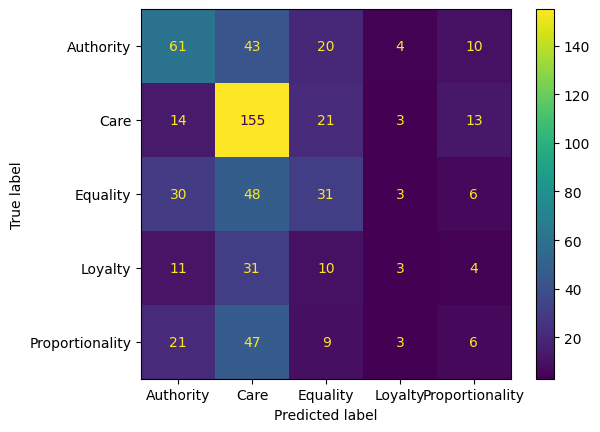

In [31]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test, y_result)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = rf.classes_)
cm_display.plot()
plt.show()

## Increasing the trees only slightly increases the accuracy from 42% to 45%

In [32]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 3000, random_state = 1)
rf.fit(X_bal, y_bal)

y_result= rf.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_result))

                 precision    recall  f1-score   support

      Authority       0.46      0.46      0.46       138
           Care       0.50      0.77      0.60       206
       Equality       0.39      0.32      0.35       118
        Loyalty       0.23      0.05      0.08        59
Proportionality       0.19      0.08      0.11        86

       accuracy                           0.45       607
      macro avg       0.35      0.34      0.32       607
   weighted avg       0.40      0.45      0.40       607



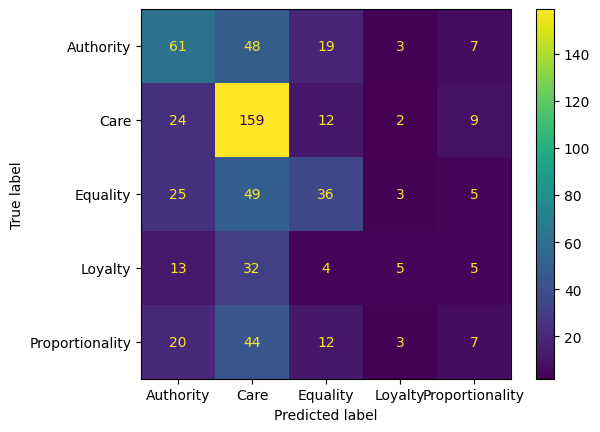

In [ ]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test, y_result)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = rf.classes_)
cm_display.plot()
plt.show()

## Now I want to take a look at how my data looks in 2D and 3D. I applied T-sNE for this purpose.

In [ ]:
z = TSNE(n_components=2).fit_transform(np.array(X_))
df = pd.DataFrame()
df["y"] = df_labeledFeatures_.label.values
#y_labeled_.flatten()
#decode(y_test)
df["comp-1"] = z[:,0]
df["comp-2"] = z[:,1]

<ipython-input-43-a24e784a2c14>:1: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),


[Text(0.5, 1.0, 'Data T-SNE projection Labeled data')]

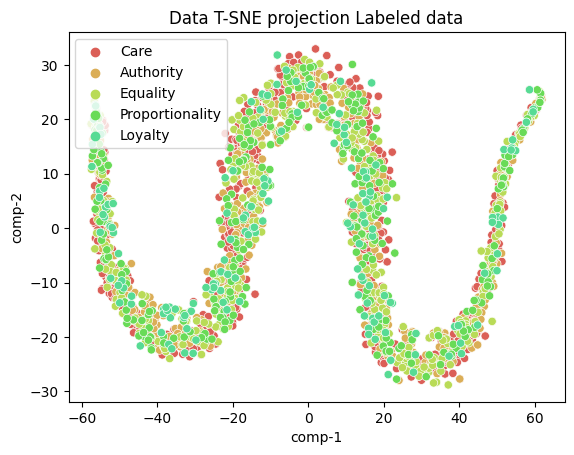

In [ ]:
sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                palette=sns.color_palette("hls", 10),
                data=df).set(title="Data T-SNE projection Labeled data")
#plt.savefig("/content/drive/MyDrive/den_yelp_notebooks/tsne_labeled_data.png")

In [ ]:
import re, seaborn as sns, numpy as np, pandas as pd, random
from pylab import *
from matplotlib.pyplot import plot, show, draw, figure, cm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
sns.set_style("whitegrid", {'axes.grid' : False})

fig = plt.figure(figsize=(6,6))

z = TSNE(n_components=3).fit_transform(np.array(X_))
df = pd.DataFrame()
df["y"] = df_labeledFeatures_.label.values

df["comp-1"] = z[:,0]
df["comp-2"] = z[:,1]
df["comp-3"] = z[:,2]


<Figure size 600x600 with 0 Axes>

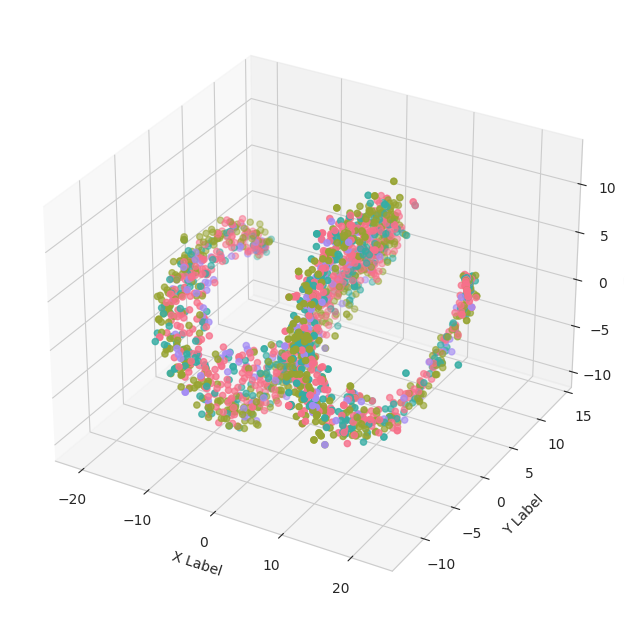

In [ ]:
from matplotlib.colors import ListedColormap
fig = plt.figure(figsize=(6,6))

ax = Axes3D(fig) # Method 1
fig.add_axes(ax)
#ax = fig.add_subplot(111, projection='3d') # Method 2

cmap = ListedColormap(sns.color_palette("husl", 256).as_hex())
ax.scatter(df["comp-1"], df["comp-2"], df["comp-3"], marker='o', cmap = cmap,  c=y_labeled_.flatten())
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

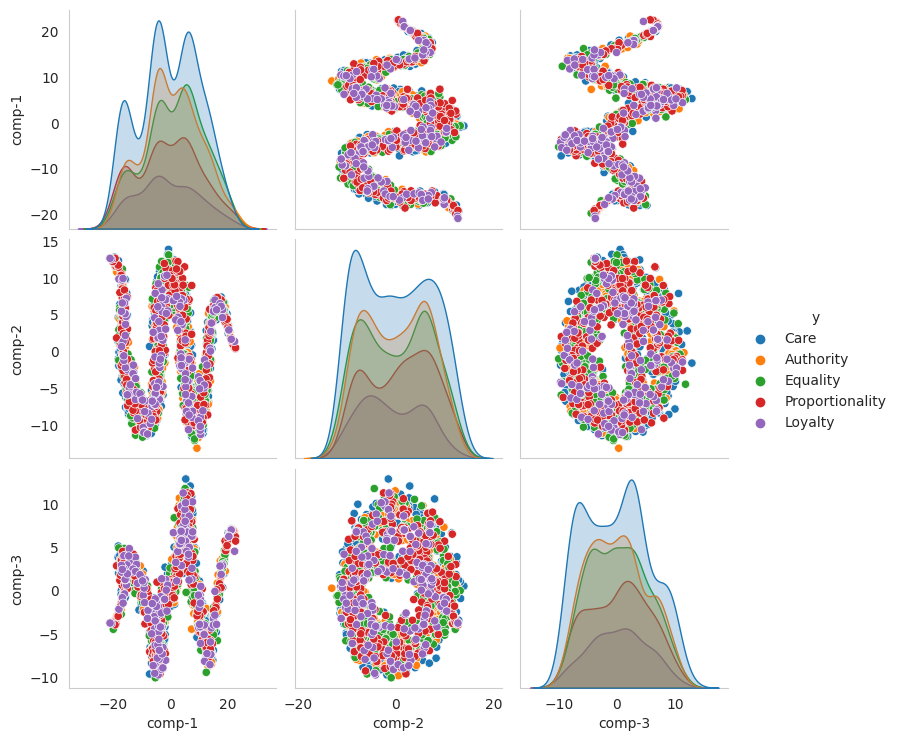

In [ ]:
sns.pairplot(df, hue='y')

# Testing model perfromace using other models

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [34]:
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(df_labeledFeatures_["comments"].values.tolist(),df_labeledFeatures_["label"],test_size=0.3, random_state=100, shuffle=True)

over_sampler = RandomOverSampler(random_state=42)
X_bal, y_bal = over_sampler.fit_resample(np.array(X_train).reshape(-1,1), y_train)

sgd = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None)),])

#sgd.fit(X_train, y_train)
sgd.fit(X_bal.flatten(), y_bal)


y_pred = sgd.predict(X_test)
tfidvect_acc = accuracy_score(y_pred, y_test)
print('accuracy %s' % tfidvect_acc)
print(classification_report(y_test, y_pred,target_names=rf.classes_))

accuracy 0.500823723228995
                 precision    recall  f1-score   support

      Authority       0.51      0.36      0.42       138
           Care       0.67      0.70      0.68       206
       Equality       0.47      0.53      0.50       118
        Loyalty       0.27      0.34      0.30        59
Proportionality       0.32      0.30      0.31        86

       accuracy                           0.50       607
      macro avg       0.45      0.45      0.44       607
   weighted avg       0.50      0.50      0.50       607



In [35]:
accuracys = {"TfidfVectorizer_Accuracy": tfidvect_acc}

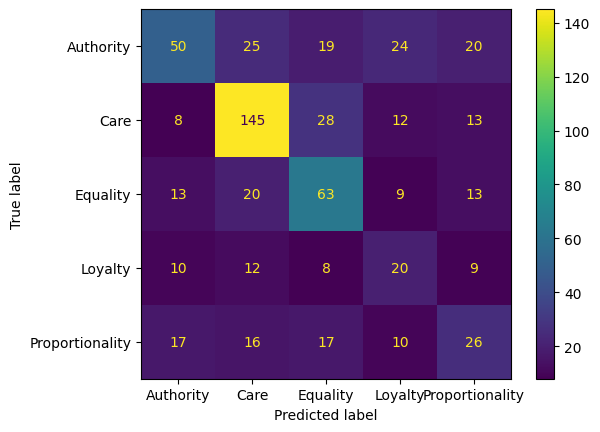

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = rf.classes_)
cm_display.plot()
plt.show()

In [36]:
from sklearn.naive_bayes import MultinomialNB
#from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer

nb = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB()),
              ])
nb.fit(X_bal.flatten(), y_bal)

#%%time
from sklearn.metrics import classification_report
y_pred = nb.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=rf.classes_))

accuracy 0.4744645799011532
                 precision    recall  f1-score   support

      Authority       0.42      0.42      0.42       138
           Care       0.69      0.67      0.68       206
       Equality       0.43      0.52      0.47       118
        Loyalty       0.20      0.24      0.22        59
Proportionality       0.28      0.20      0.23        86

       accuracy                           0.47       607
      macro avg       0.41      0.41      0.40       607
   weighted avg       0.47      0.47      0.47       607



In [41]:
rf_ = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf',RandomForestClassifier(n_estimators = 500, random_state = 42)),
              ])
rf_.fit(X_bal.flatten(), y_bal)

#%%time
from sklearn.metrics import classification_report
y_pred = rf_.predict(X_test)

rf_accuracy = accuracy_score(y_pred, y_test)
print('accuracy %s' % rf_accuracy)
print(classification_report(y_test, y_pred,target_names=rf.classes_))

accuracy 0.5041186161449753
                 precision    recall  f1-score   support

      Authority       0.46      0.48      0.47       138
           Care       0.52      0.83      0.64       206
       Equality       0.64      0.45      0.53       118
        Loyalty       0.18      0.05      0.08        59
Proportionality       0.40      0.16      0.23        86

       accuracy                           0.50       607
      macro avg       0.44      0.39      0.39       607
   weighted avg       0.48      0.50      0.47       607



In [38]:
from sklearn.linear_model import LogisticRegression

logreg = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression(n_jobs=1, C=1e5, max_iter  = 800)),
               ])
logreg.fit(X_bal.flatten(), y_bal)

y_pred = logreg.predict(X_test)
LogReg_accuracy = accuracy_score(y_pred, y_test)
accuracys["Logistic_Accuracy"] = LogReg_accuracy
print('accuracy %s' % LogReg_accuracy)
print(classification_report(y_test, y_pred,target_names=rf.classes_))

accuracy 0.4827018121911038
                 precision    recall  f1-score   support

      Authority       0.47      0.43      0.45       138
           Care       0.61      0.68      0.64       206
       Equality       0.44      0.50      0.47       118
        Loyalty       0.40      0.20      0.27        59
Proportionality       0.26      0.26      0.26        86

       accuracy                           0.48       607
      macro avg       0.44      0.41      0.42       607
   weighted avg       0.47      0.48      0.47       607



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [45]:
accuracys["RandomFores"] = rf_accuracy

In [46]:
accuracys

{'TfidfVectorizer_Accuracy': 0.500823723228995,
 'Logistic_Accuracy': 0.4827018121911038,
 'RandomFores': 0.5041186161449753}

In [48]:
accuracys.keys()

dict_keys(['TfidfVectorizer_Accuracy', 'Logistic_Accuracy', 'RandomFores'])

In [51]:
accuracys.values()

dict_values([0.500823723228995, 0.4827018121911038, 0.5041186161449753])

## The accuracy of all of the models revolves around 50%. Other word vetorization techniques could work better to extract sentiments out of short texts such as comments

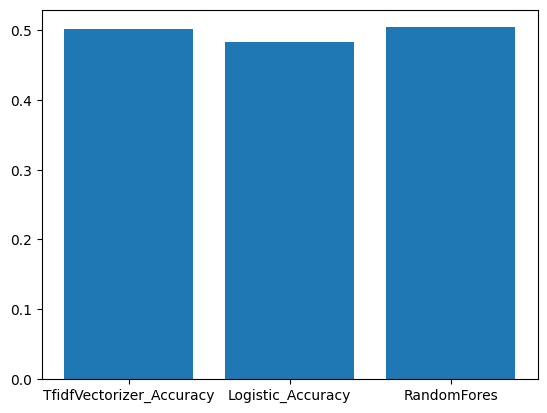

In [52]:
plt.bar(accuracys.keys(), accuracys.values())
plt.show()